# Information about the 2 datasets:

1.This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
The dataset represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

2.The second dataset contains information about climatic conditions created in Sceaux city for futher data visualization and for the sake of pairing different electric power consumption spikes with temperautre reasons.The data is collected by computing monthly averages over the Period of calculating Electric Power Consumptions (16-11-2006 ----> 11-12-2010) 


Download datasets from :
1: http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

2: https://www.visualcrossing.com/weather  (using a free trial account)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns








In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2



In [3]:

df = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\household_power_consumption\household_power_consumption.txt", sep=';',
                 parse_dates=True,
                 dtype={"Date":"string","Time":"string","Global_active_power":"float","Global_reactive_power":"float","Voltage":"float","Global_intensity":"float","Sub_metering_1":"float","Sub_metering_2":"float","Sub_metering_3":"float"},
                 low_memory=False,na_values=['nan','?'])

In [4]:
#Know your data
df.dtypes

Date                      string
Time                      string
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [5]:
df.shape

(2075259, 9)

In [6]:
#merge the Date and Time columns and concatenate the formed column into the end of the df
df["Date_Time"]= df["Date"].str.cat(df["Time"] , sep=" ")


In [7]:
#Drop both the "Date" and "Time" columns 
df.drop(["Date","Time"],axis=1,inplace=True)


In [8]:
#set the new concatenated column as the index
df.set_index(["Date_Time"],inplace=True)

In [9]:
#Working On Missing Data

#check the missing data
df.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
#checking corrupted columns (with missing values)

corrupted_columns=[]

for i in range(7):
    if df.iloc[:,1].isnull().sum()>0:
        corrupted_columns.append(i)
        
print(corrupted_columns)  #all columns are to be visualized for filling missing data

[0, 1, 2, 3, 4, 5, 6]


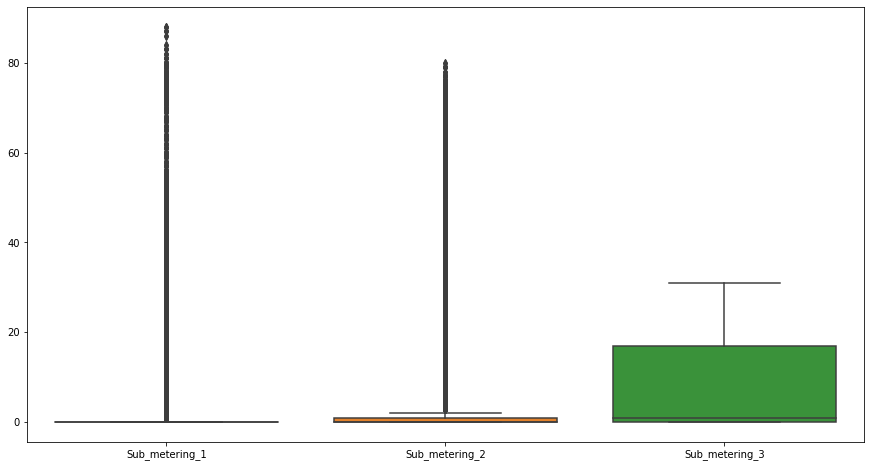

In [11]:
#plotting boxplot for the columns to compute means to be assigned to missing values
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,4:])

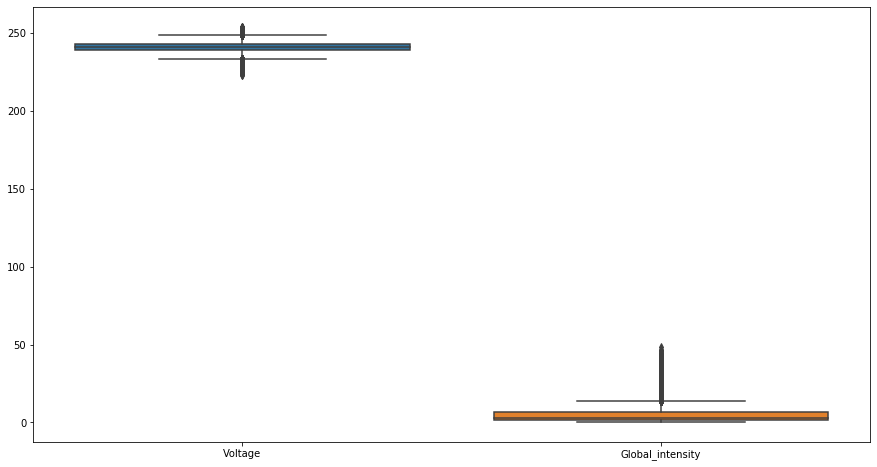

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,2:4])

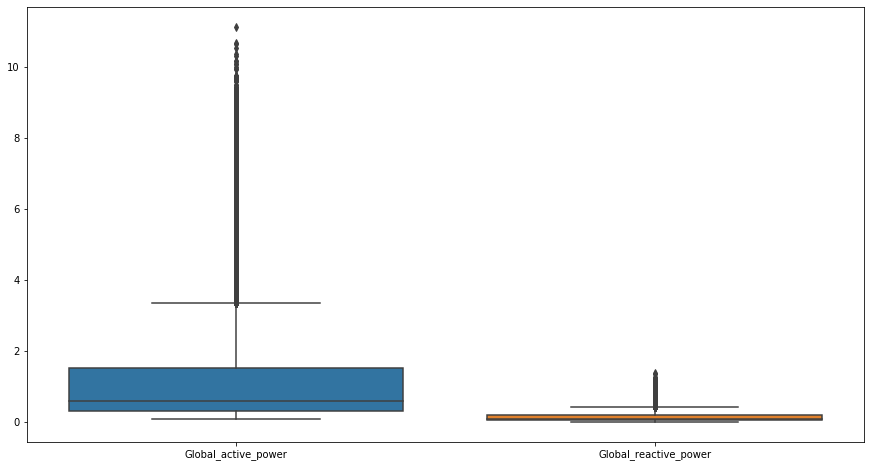

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,:2])

In [14]:
#fill NAN's with means
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
    

In [15]:
#Validation of the filling missing values process
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# DATA VISUALIZATIONS

In [16]:
#Clean data
df.to_csv(r"C:\Users\User\Desktop\DATA SCIENCE\household_power_consumption\household_power_consumption1.csv")

In [17]:
data = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\household_power_consumption\household_power_consumption1.csv")

In [18]:
#change dtype of "Date_Time" column to compute Resamplings
data["Date_Time"]=pd.to_datetime(data["Date_Time"])

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [20]:
#change Date_Time to be index 
data= data.set_index("Date_Time")


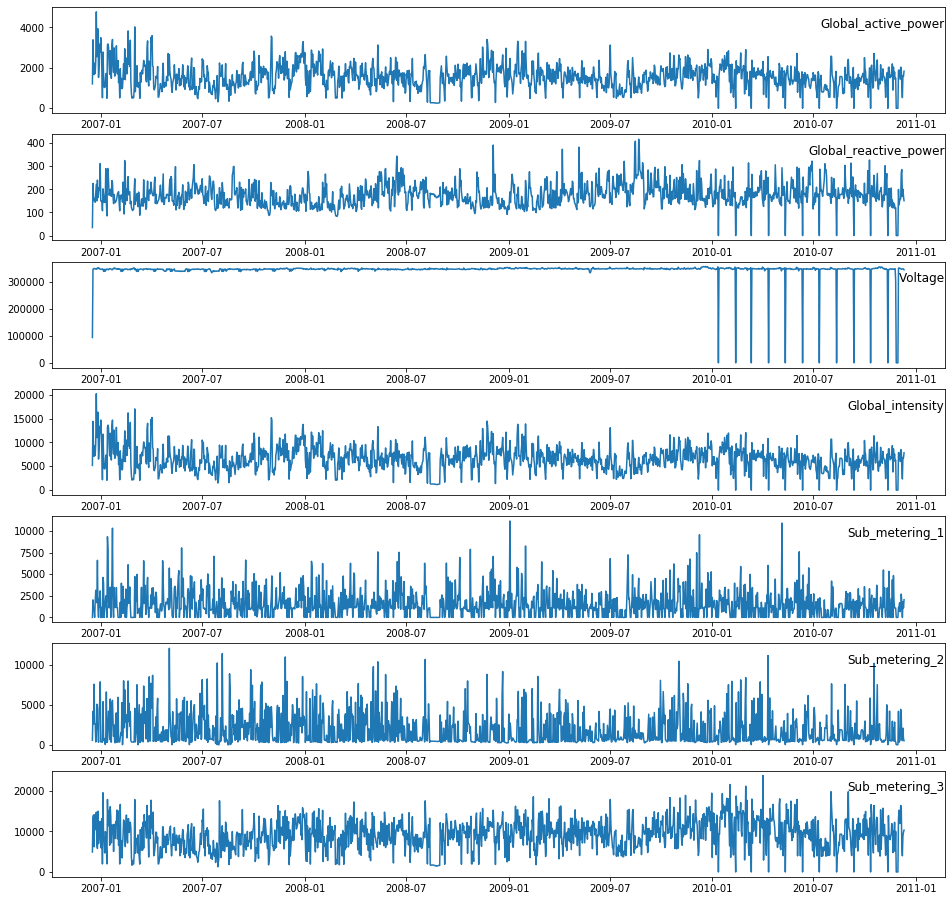

In [21]:
#Resampling data over days and plotting
daily_data= data.resample("D").sum()

cols=[0,1,2,3,4,5,6]
plt.figure(figsize=(16,16))
i=1

for col in cols:
    plt.subplot(len(cols),1,i)
    plt.plot(daily_data.iloc[:,i-1])
    plt.title(daily_data.columns[col], y=0.75, loc='right')
    i=i+1

    

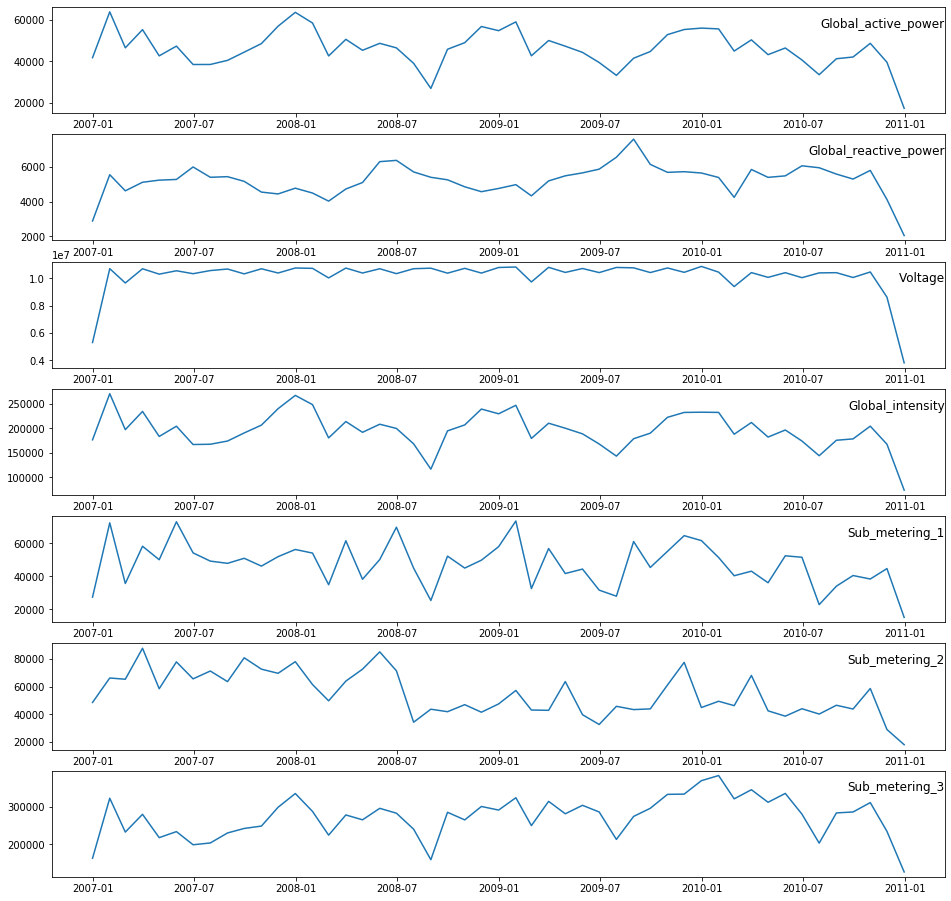

In [22]:
#Resampling data over months and plotting
monthly_data= data.resample("M")

cols=[0,1,2,3,4,5,6]
plt.figure(figsize=(16,16))
i=1

for col in cols:
    plt.subplot(len(cols),1,i)
    plt.plot(monthly_data.sum().iloc[:,i-1])
    plt.title(monthly_data.sum().columns[col], y=0.75, loc='right')
    i=i+1

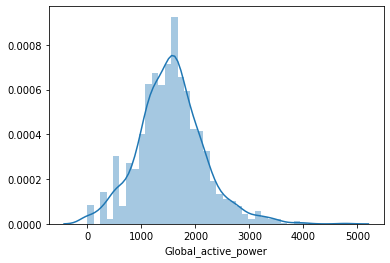

In [23]:
D = sns.distplot(daily_data["Global_active_power"],bins=40)

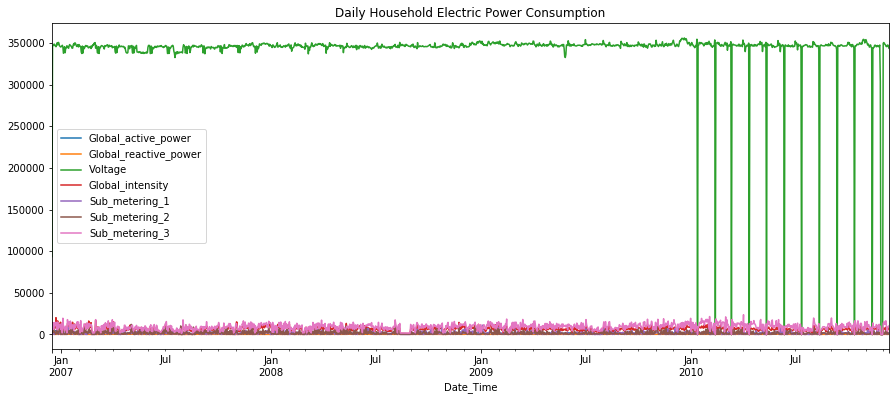

In [24]:
#Daily household power consumption 
y = daily_data.plot(title='Daily Household Electric Power Consumption', figsize=(15,6), linestyle='solid')


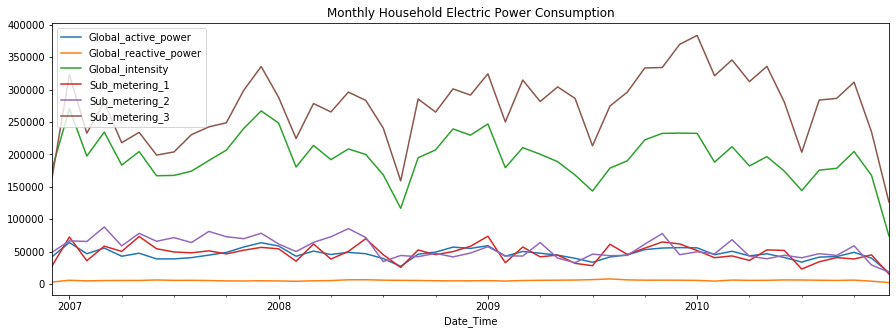

In [25]:
z= monthly_data.sum().drop("Voltage",axis=1).plot(title = "Monthly Household Electric Power Consumption",figsize=(15,5))

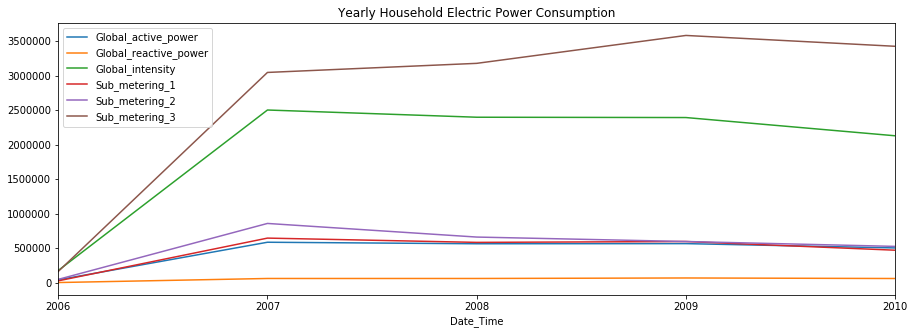

In [26]:
yearly_data = data.resample("Y")
yearly1 = yearly_data.sum()

t= yearly1.drop("Voltage",axis=1).plot(title = "Yearly Household Electric Power Consumption",figsize=(15,5))

# Reading the second csv file ("Sceaux_France")

In [27]:
Sceaux_France = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Sceaux_France2.csv")


In [28]:
#Know your second dataset! 
Sceaux_France 


,Location,Unnamed: 1,Unnamed: 2,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,"Sceaux,France",NaN,NaN,Jan,56.3,13.7,33.2,3.8,0.0,2.1,1.6,25.6,67.4,245.4,82.84
1,"Sceaux,France",NaN,NaN,Feb,53.8,19.6,36.4,11.2,0.0,2.3,0.1,20.0,76.1,168.6,82.98
2,"Sceaux,France",NaN,NaN,Mar,65.1,19.2,42.0,7.4,0.0,3.5,1.1,21.6,57.5,161.0,72.08
3,"Sceaux,France",NaN,NaN,Apr,74.1,30.8,52.5,27.5,0.0,2.1,0.3,14.5,47.2,157.0,66.17
4,"Sceaux,France",NaN,NaN,May,85.3,38.2,58.2,32.4,84.4,3.2,0.0,30.5,72.5,167.2,68.63
5,"Sceaux,France",NaN,NaN,Jun,91.3,42.5,62.3,37.9,90.2,4.1,0.0,21.9,47.2,173.4,72.19
6,"Sceaux,France",NaN,NaN,Jul,89.1,47.7,63.8,46.4,89.4,4.4,0.0,14.2,54.1,173.2,72.42
7,"Sceaux,France",NaN,NaN,Aug,89.0,46.0,64.5,43.0,88.3,6.0,0.0,17.9,65.5,161.9,76.23
8,"Sceaux,France",NaN,NaN,Sep,82.1,39.8,59.1,36.8,82.5,4.0,0.0,19.5,68.0,151.0,79.94
9,"Sceaux,France",NaN,NaN,Oct,75.7,27.3,50.1,26.5,0.0,3.5,0.0,21.7,69.1,150.4,84.16


In [29]:
#clearly the first three columns are to be dropped 
Sceaux_France.drop(["Location","Unnamed: 1","Unnamed: 2"],axis=1,inplace=True)



#let's plot the variation of Temperature in Sceaux city as a function of Month

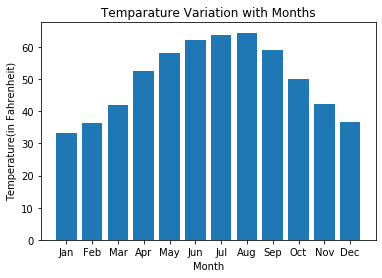

In [30]:
plt.title("Temparature Variation with Months")
plt.xlabel("Month")
plt.ylabel("Temperature(in Fahrenheit)")
plt.bar(Sceaux_France["Period"],Sceaux_France["Temperature"])
plt.show()

In [31]:
#For instance by taking the timespan of 2007-2008(a complete year)
#a clear impact of Temperature on Electric Power Consumption can be observed 


#create a sub-dataset from the monthly-data between 2007 and 2008 named Year_From_Years
Year_From_Years = monthly_data.sum().iloc[1:13,:]

# Dataset Documentation:

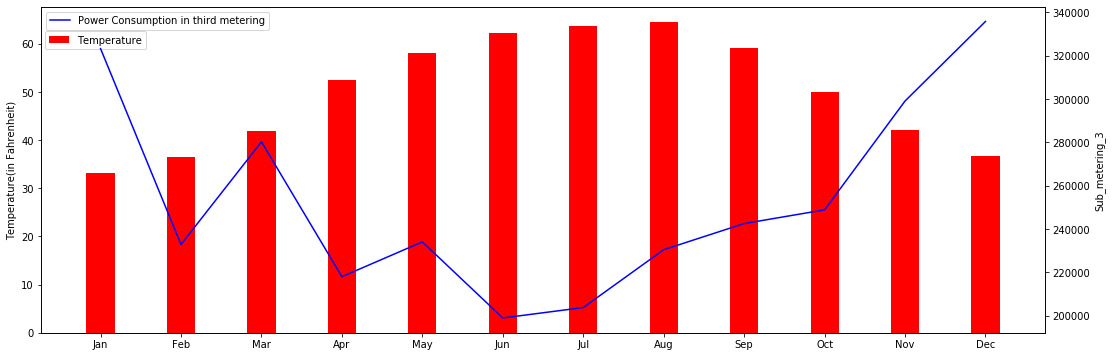

In [32]:
#Attribute Information:
#sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy)
#It corresponds to an electric water-heater and an air-conditioner

plt.figure(figsize=(18,6))

plt.bar(Sceaux_France["Period"], Sceaux_France["Temperature"],color='r',width=0.35, label = "Temperature")
plt.ylabel("Temperature(in Fahrenheit)")
plt.legend(loc=(0.0045,0.87))

axes2 = plt.twinx()
axes2.plot(Sceaux_France["Period"], Year_From_Years["Sub_metering_3"], color='b' , label="Power Consumption in third metering")
axes2.set_ylabel('Sub_metering_3')

plt.legend()


#Clearly the colder month of the year ,such as January and december , have the highest electric power consumption 
#due to the use of water heaters and air conditioning


In [33]:
#Splitting the data
#model will be trained on data from 2006-->2009
##use first 6 months of the year 2010 for validation and last 6 months for testing
#We are only interested in the global active power 

data_test= daily_data["2010-01-01":"2010-06-30"]["Global_active_power"]
data_validate = daily_data["2010-07-1":"2010-12-11"]["Global_active_power"]
print(data_test,data_test.shape,data_validate,data_validate.shape)


Date_Time
2010-01-01    1224.252000
2010-01-02    1693.778000
2010-01-03    1298.728000
2010-01-04    1687.440000
2010-01-05    1320.158000
                 ...     
2010-06-26     981.620000
2010-06-27    1139.964000
2010-06-28    1471.340000
2010-06-29    1368.387615
2010-06-30    1384.136000
Freq: D, Name: Global_active_power, Length: 181, dtype: float64 (181,) Date_Time
2010-07-01    1769.442
2010-07-02    1625.708
2010-07-03    1372.472
2010-07-04    1596.982
2010-07-05    1644.004
                ...   
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, Length: 164, dtype: float64 (164,)


In [34]:
data_train = daily_data.loc[:"2009-12-31",:]["Global_active_power"]
print(data_train,data_train.shape)

Date_Time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2009-12-27    2195.452
2009-12-28    2094.098
2009-12-29    2047.968
2009-12-30    2451.110
2009-12-31    2211.892
Freq: D, Name: Global_active_power, Length: 1112, dtype: float64 (1112,)


In [35]:
#conver data_train to numpy array
data_train = np.array(data_train)
X_train=[]
y_train=[]

for i in range(7,len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])



In [36]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print("The shape of X_train is :{}".format(X_train.shape))
print("The shape of y_train is :{}".format(y_train.shape))

The shape of X_train is :(1098, 7)
The shape of y_train is :(1098, 7)


In [37]:
#Rescaling down the datasets

scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)


In [38]:
scaler_y = MinMaxScaler()
y_train =scaler_y.fit_transform(y_train)

In [39]:
#Reshaping the data to fit the input shape to the LSTM network
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1],1)

In [40]:
#LSTM MODEL

model = Sequential()

model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(7,1)))
model.add(Dropout(0.5))

model.add(LSTM(50,activation="relu",return_sequences=False))
model.add(Dense(7, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


model.compile(optimizer="adam",loss="mean_squared_error")




In [41]:
model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 30,957
Trainable params: 30,957
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Validation X and y sets
data_validate = np.array(data_validate)
X_validate=[]
y_validate=[]

for i in range(7,len(data_validate)-7):
    X_validate.append(data_validate[i-7:i])
    y_validate.append(data_validate[i:i+7])

    

In [43]:
#testing X and y sets
data_test =np.array(data_test)

X_test=[]
y_test = []

for i in range(7,len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7]) 
    

    

In [44]:
#preparing the validation set

X_validate = np.array(X_validate)
y_validate = np.array(y_validate)


X_validate = scaler_X.fit_transform(X_validate)
y_validate =scaler_y.fit_transform(y_validate)


X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],1)
y_validate = y_validate.reshape(y_validate.shape[0],y_validate.shape[1],1)


In [45]:
history = model.fit(X_train,y_train,epochs=40,validation_data=(X_validate,y_validate),batch_size=64,shuffle=False)

Train on 1098 samples, validate on 150 samples
Epoch 1/40
1098/1098 [==============================] - 3s 3ms/sample - loss: 0.2531 - val_loss: 0.3606
Epoch 2/40
1098/1098 [==============================] - 0s 349us/sample - loss: 0.1984 - val_loss: 0.2319
Epoch 3/40
1098/1098 [==============================] - 0s 314us/sample - loss: 0.1296 - val_loss: 0.1397
Epoch 4/40
1098/1098 [==============================] - 0s 348us/sample - loss: 0.1046 - val_loss: 0.1281
Epoch 5/40
1098/1098 [==============================] - 0s 305us/sample - loss: 0.0929 - val_loss: 0.1192
Epoch 6/40
1098/1098 [==============================] - 0s 317us/sample - loss: 0.0830 - val_loss: 0.1095
Epoch 7/40
1098/1098 [==============================] - 0s 339us/sample - loss: 0.0748 - val_loss: 0.1016
Epoch 8/40
1098/1098 [==============================] - 0s 284us/sample - loss: 0.0672 - val_loss: 0.0947
Epoch 9/40
1098/1098 [==============================] - 0s 302us/sample - loss: 0.0615 - val_loss: 0.0900
E

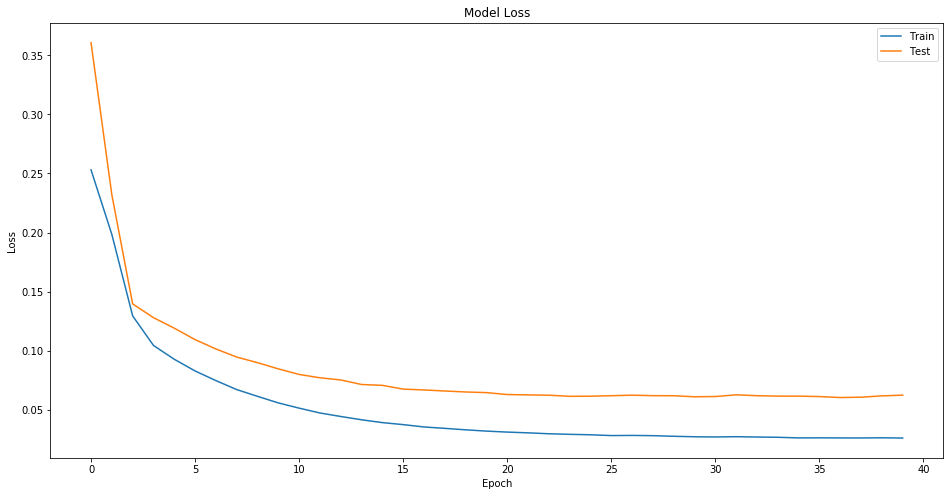

In [46]:
#learning curve for the training set
plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train',"Test"], loc='upper right')
plt.show()


In [47]:
#preparing the test set

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test =scaler_X.fit_transform(X_test)
y_test = scaler_y.fit_transform(y_test)


X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)




In [48]:
#PREDICTIONS
y_pred=model.predict(X_test)

#return y_pred to original scale
y_pred = scaler_y.inverse_transform(y_pred)

#return y_test to original scale
y_true = scaler_y.inverse_transform(y_test)


In [49]:
#Evaluation 

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("the RMSE of the test is : {}".format(rmse))

the RMSE of the test is : 690.516179717822


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\User\Desktop\DATA SCIENCE\household_power_consumption\electricpower.model\assets
